In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
import segmenter as pb
import sam3d as s3d
import open3d as o3d
from psdframe import Frame
from psdstaticdataset import StaticDataset
from pathlib import Path
from matplotlib import pyplot as plt
from initializerdefs import SceneSetup, Observations
from segment_anything import build_sam, SamAutomaticMaskGenerator
from util import Voxelize, num_to_natural

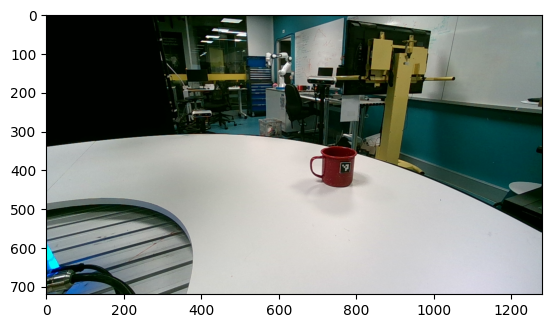

In [5]:
inputs_path = Path("/home/david/projects/deg/results/sam3d-mask-manual/embodied_gaussians_real/mug1_aruco/run_1")



scene = SceneSetup.load(inputs_path / "scene.pkl")
observations = Observations.load(inputs_path / "observations.pkl")

plt.imshow(observations.frames[0].color)
plt.show()

In [24]:
result = pb.initialize_scene(observations, scene)

merging 5 point clouds
merging 3 point clouds
merging 2 point clouds


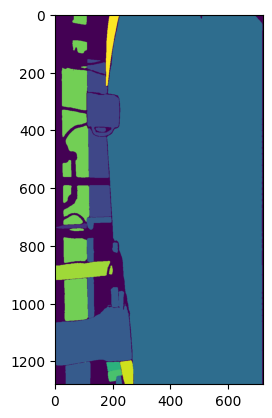

In [43]:
plt.imshow(result.object_segmentations.pixel_object_ids[4])
plt.show()

In [44]:
np.unique(result.object_segmentations.pixel_object_ids[0])

array([-1,  0,  1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 22, 24, 25, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38],
      dtype=int32)

In [45]:
np.unique(result.object_segmentations.pixel_object_ids[1])

array([-1,  0,  1,  2,  3,  4], dtype=int32)

In [46]:
np.unique(result.object_segmentations.pixel_object_ids[2])

array([-1,  2,  4], dtype=int32)

In [47]:
np.unique(result.object_segmentations.pixel_object_ids[3])

array([-1,  2,  4], dtype=int32)

In [48]:
np.unique(result.object_segmentations.pixel_object_ids[4])

array([-1,  1,  2,  3,  4,  8,  9, 10, 11, 12, 13], dtype=int32)

In [52]:
from segmenter import SamAutomaticMaskGenerator, Voxelize, get_scene_bounding_box, seg_pcd, VOXEL_SIZE, sam_checkpoint
from segment_anything import build_sam






mask_generator = SamAutomaticMaskGenerator( build_sam(checkpoint=sam_checkpoint).to(device="cuda"))
voxelize = Voxelize(voxel_size=VOXEL_SIZE, mode="train", keys=("coord", "color", "group", "normals"))


# extract bounding box from scene
obb = get_scene_bounding_box(scene)

#mall_observations = Observations(frames=observations.frames[:2])

segmented_cloud, instance_groups, group_mapping = seg_pcd(observations, mask_generator, voxelize, bbox=obb)

merging 5 point clouds
merging 3 point clouds
merging 2 point clouds


In [53]:
[np.unique(instance_groups[k]) for k in instance_groups.keys()]


[array([-1,  0,  1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 22, 24, 25, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75,
        76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       dtype=int32),
 array([-1,  0,  1,  2,  3,  4,  5,  7,  9, 10, 11, 12, 13, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55], dtype=int32),
 array([-1,  0,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       dtype=int32),
 array([-1,  0,  1,  2,  3,  4,  

In [58]:
np.unique(segmented_cloud["group"])


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39])

In [17]:
import numpy as np

np.unique(side), np.unique(back)

(array([ -1,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  90,  91,
         92,  93,  94,  95,  97,  99, 100, 101, 102, 103, 105, 106, 107,
        108, 111, 112, 113, 115, 116, 117, 119, 120, 121, 122, 123, 124,
        125, 128, 129, 130, 132, 134, 135, 137, 139, 142], dtype=int32),
 array([-1,  1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19,
        20, 22, 24, 25, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
        43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
        60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77,
        78, 79, 80, 81, 82, 84, 86, 87, 88], dtype=int32))

In [57]:
group_ids = np.unique(segmented_cloud["group"])

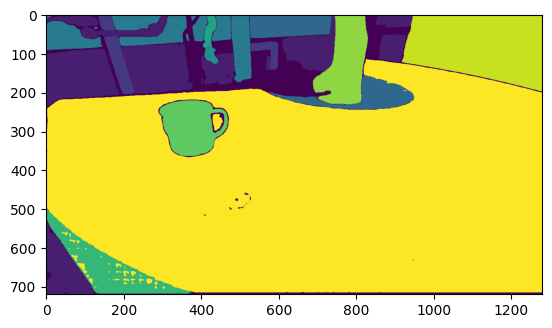

In [23]:
new_side = side.copy()
new_side[~np.isin(side, group_ids)] = 0
plt.imshow(new_side)
plt.show()











In [9]:
from segmenter import LabelledPcd


segmented_cloud: LabelledPcd = segmented_cloud

In [10]:
import open3d as o3d
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(segmented_cloud["coord"])
pcd.colors = o3d.utility.Vector3dVector(segmented_cloud["color"])



o3d.visualization.draw_geometries([pcd])





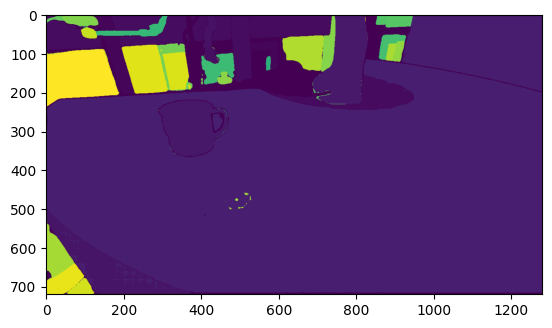

In [12]:
import matplotlib.pyplot as plt
plt.imshow(instance_groups['side'])
plt.show()

In [13]:
# Apply categorical color map to visualize segments
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# Get unique group IDs
unique_groups = np.unique(segmented_cloud["group"])
n_groups = len(unique_groups)
print(f"Found {n_groups} unique segments: {unique_groups}")

# Create categorical color map
# Use tab20 for up to 20 distinct colors, or generate more if needed
if n_groups <= 20:
    cmap = cm.get_cmap('tab20')
    colors = [cmap(i) for i in range(n_groups)]
else:
    # For more than 20 groups, use hsv to generate distinct colors
    cmap = cm.get_cmap('hsv')
    colors = [cmap(i / n_groups) for i in range(n_groups)]

# Create mapping from group ID to color
group_to_color = {}
for i, group_id in enumerate(unique_groups):
    if group_id == -1:  # Background/unlabeled points
        group_to_color[group_id] = (0.3, 0.3, 0.3)  # Gray
    else:
        group_to_color[group_id] = colors[i][:3]  # RGB only (drop alpha)

# Apply colors to point cloud
categorical_colors = np.array([group_to_color[group_id] for group_id in segmented_cloud["group"]])

print(f"Color mapping created for {n_groups} segments")
print("Sample colors:", [group_to_color[gid] for gid in unique_groups[:5]])


Found 18 unique segments: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Color mapping created for 18 segments
Sample colors: [(0.3, 0.3, 0.3), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]


/tmp/ipykernel_921524/1895589378.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')


In [14]:
# Visualize point cloud with categorical colors
import open3d as o3d

# Create point cloud with categorical colors
pcd_categorical = o3d.geometry.PointCloud()
pcd_categorical.points = o3d.utility.Vector3dVector(segmented_cloud["coord"])
pcd_categorical.colors = o3d.utility.Vector3dVector(categorical_colors)

# Display the categorically colored point cloud
print("Displaying point cloud with categorical color map...")
o3d.visualization.draw_geometries([pcd_categorical], 
                                 window_name="Segmented Point Cloud - Categorical Colors",
                                 width=800, height=600)


Displaying point cloud with categorical color map...


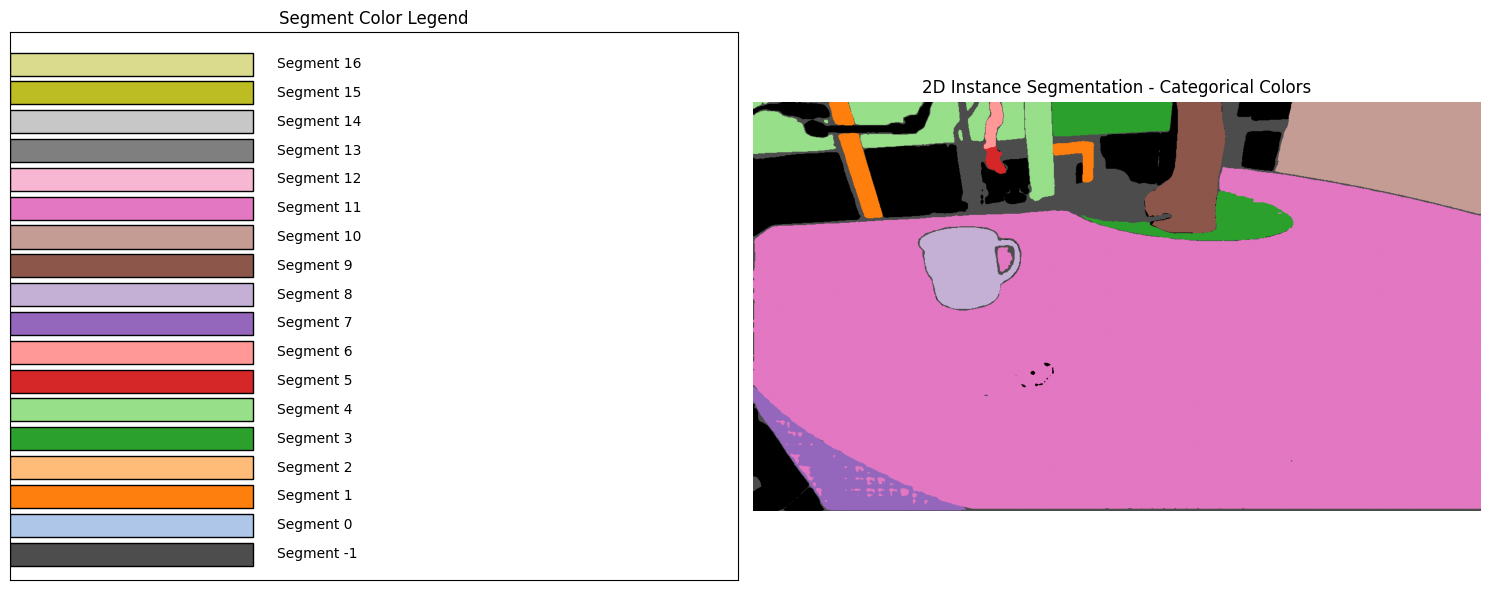

✓ Categorical color map applied successfully!
✓ 18 segments colored with distinct categorical colors
✓ Background/unlabeled points (group -1) shown in gray


In [15]:
# Create a color legend for the segments
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Show color legend
ax1.set_title("Segment Color Legend")
y_pos = 0
for group_id in sorted(unique_groups):
    color = group_to_color[group_id]
    rect = patches.Rectangle((0, y_pos), 1, 0.8, linewidth=1, 
                           edgecolor='black', facecolor=color)
    ax1.add_patch(rect)
    ax1.text(1.1, y_pos + 0.4, f"Segment {group_id}", 
             verticalalignment='center', fontsize=10)
    y_pos += 1

ax1.set_xlim(0, 3)
ax1.set_ylim(-0.5, len(unique_groups) + 0.5)
ax1.set_xticks([])
ax1.set_yticks([])

# Show instance groups visualization with categorical colors if available
if 'instance_groups' in locals():
    # Apply categorical colors to 2D instance visualization
    instance_img = instance_groups['side'] if 'side' in instance_groups else list(instance_groups.values())[0]
    
    # Create categorical colored version
    colored_instance = np.zeros((*instance_img.shape, 3))
    for group_id in unique_groups:
        mask = instance_img == group_id
        if np.any(mask):
            colored_instance[mask] = group_to_color[group_id]
    
    ax2.imshow(colored_instance)
    ax2.set_title("2D Instance Segmentation - Categorical Colors")
    ax2.axis('off')
else:
    ax2.text(0.5, 0.5, "Instance groups not available", 
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title("2D Visualization")

plt.tight_layout()
plt.show()

print(f"✓ Categorical color map applied successfully!")
print(f"✓ {n_groups} segments colored with distinct categorical colors")
print(f"✓ Background/unlabeled points (group -1) shown in gray")
